In [1]:
using PyPlot
PyPlot.svg(true)

true

In [2]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

In [4]:
# compile code
i = testcase("timing")
@time o = solve_temporal_instanton(i;silent=true);
sort(o.score)

104-element Array{Tuple{Float64,Int64},1}:
 (0.2637878300195491,25) 
 (0.32731641832940167,30)
 (1.288610736634812,69)  
 (2.204151593685044,89)  
 (2.322973886043764,118) 
 (2.4231615471272647,64) 
 (4.6787554623751175,42) 
 (4.865240811111168,102) 
 (4.8991672011576375,31) 
 (5.67826604880581,80)   
 (5.938620037617324,1)   
 (6.439172990445762,100) 
 (6.460888758468381,62)  
 ⋮                       
 (178.0855817862236,99)  
 (303.0032857321986,103) 
 (370.6144351201758,66)  
 (370.6144351201758,67)  
 (391.3070873722265,33)  
 (428.9444922331189,40)  
 (923.9799853876266,72)  
 (979.1988880483405,117) 
 (1319.8524187115208,79) 
 (1390.0270570283053,110)
 (1967.2698882361126,73) 
 (1967.2698882361126,74) 

0.588679 seconds (28.50 k allocations: 3.441 MB)


## Average QCQP solution time vs no. of decision variables

Takes 20 minutes to compute. 2:2:72 implies 36 analyses with 50 reps each. 1800 total analyses at half a second per analysis is 15 minutes.

### RTS-96

In [4]:
case = "case96"
# maxLines = 10
reps = 30 # used to illustrate solution time variation
line_times_96 = Vector{Vector{Float64}}()

for rep in 1:reps
    num_farms_vec = collect(2:2:72)
#     gen_count = Vector{Int64}()
#     mpc = loadcase(case,describe=false)
#     push!(gen_count,length(unique(mpc["gen"][:,1])))

#     score_output = Array(Vector{Tuple{Float64,Int64}},0)
#     sec_elapsed = Vector{Float64}()
    line_times = Vector{Vector{Float64}}()
#     bytes_alloc = Vector{Float64}()
#     sec_in_gc = Vector{Float64}()
#     wind_count = Vector{Int64}()

    for i in 1:length(num_farms_vec)
        num_farms = num_farms_vec[i]
#         push!(wind_count,num_farms)
        penetration = 0.7
        d = mat2tmpinst(case,num_farms,penetration)

        # Thermal model parameters:
        d.Tamb = 35. # C
        d.T0 = 60. #46. # initial line steady-state temp

#         d.time_values = 0:600:3600 # one hour in 10-minute steps
#         d.int_length = 3600. # seconds = one hour
        d.time_values = 0:30:300 # five minutes in 30-sec steps
        d.int_length = 300. # seconds = 5 min

        Gp,Dp,Rp = (d.G0, d.D0, d.R0)
        d.G0 = [Gp;Gp;Gp;Gp;Gp;Gp]
        d.D0 = [Dp;Dp;Dp;Dp;Dp;Dp]
        d.R0 = [Rp;Rp;Rp;Rp;Rp;Rp]

        n = length(d.k)
        nr = length(d.Ridx)
        T = convert(Int64,length(d.G0)/n)

        timed_results = @timed o = solve_temporal_instanton(d,silent=true);#,maxLines);
#         push!(score_output,o.score)
#         push!(sec_elapsed,timed_results[2])
#         push!(bytes_alloc,timed_results[3])
#         push!(sec_in_gc,timed_results[4])
        push!(line_times,o.linetimes)
    end

    # lines_processed = []
    # for score_vec in score_output
    #     push!(lines_processed, sum(score_vec.!=Inf))
    # end

    push!(line_times_96, [mean(line_times[i]) for i in 1:length(line_times)])
    println("$rep / $reps")
end

0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6
0.6333333333333333
0.6666666666666666
0.7
0.7333333333333333
0.7666666666666667
0.8
0.8333333333333334
0.8666666666666667
0.9
0.9333333333333333
0.9666666666666667
1.0


In [6]:
# store the data that took a half hour to obtain
using JLD
save("../data/2015-11-25-line_times_96.jld", "line_times_96", line_times_96)

In [3]:
# store the data that took a half hour to obtain
using JLD
line_times_96 = load("../data/2015-11-25-line_times_96.jld")["line_times_96"]

30-element Array{Array{Float64,1},1}:
 [0.0026819,0.00434562,0.00467277,0.00498187,0.00499727,0.00512433,0.00645925,0.00632773,0.00782158,0.00810028  …  0.0438924,0.0459021,0.0511446,0.0560246,0.0560211,0.0765669,0.0704028,0.0678472,0.0808862,0.07738]  
 [0.00577003,0.00435942,0.00892886,0.00766912,0.00765475,0.00678206,0.00821373,0.0086255,0.00887238,0.0122836  …  0.04331,0.0463657,0.0492514,0.0520491,0.0538663,0.0594874,0.0633374,0.0745594,0.0831353,0.0887129]   
 [0.00827672,0.00583123,0.0073895,0.00826011,0.00759856,0.00975372,0.0101765,0.0132621,0.011719,0.0112658  …  0.0432572,0.0457731,0.0485761,0.0521972,0.0728217,0.0595787,0.0619793,0.0725233,0.0697297,0.0734819]     
 [0.00441446,0.00453697,0.00467319,0.00537253,0.0057966,0.00852601,0.00816009,0.00909374,0.00815325,0.00974861  …  0.0425161,0.0455733,0.0487551,0.051079,0.0561925,0.0598026,0.0627149,0.066159,0.0698731,0.0733289]  
 [0.00525657,0.00553332,0.00601009,0.00650741,0.00626261,0.00585243,0.00735674,0.00715765,0.008383

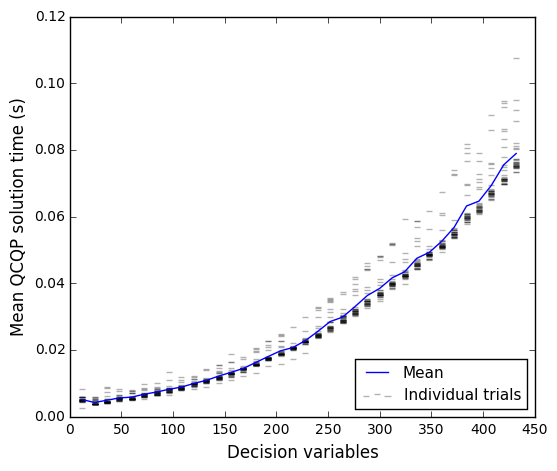

In [5]:
fig = figure(figsize=(6,5))
hold(true)

x96 = collect(2:2:72)*6

for i in 1:length(line_times_96)
    y96 = line_times_96[i]
    scatter(x96,y96,marker="_",facecolor="black",alpha=0.3)
end

plot(x96,mean(line_times_96))

legend(["Mean";"Individual trials"],loc=4,fontsize=11)

axis([0;450;0;0.12])
xlabel("Decision variables")
ylabel("Mean QCQP solution time (s)")
xticks(size=10)
yticks(size=10)
# savefig("../paper2/images/rts-96-scaling-dots-2.pdf")

### Polish grid

In [ ]:
include("../src/mat2tmpinst.jl")
case = "case2383wp"
maxLines = 5
reps = 5
line_times_2383 = Vector{Vector{Float64}}()
num_farms_vec = collect(80:20:400)
for rep in 1:reps
    line_times = Vector{Vector{Float64}}()

    for i in 1:length(num_farms_vec)
        num_farms = num_farms_vec[i]
#         println("wind farms: $num_farms")
        penetration = 0.7
        d = mat2tmpinst(case,num_farms,penetration)

        # Thermal model parameters:
        d.Tamb = 35. # C
        d.T0 = 60. #46. # initial line steady-state temp

        d.time_values = 0:30:300 # five minutes in 30-sec steps
        d.int_length = 300. # seconds = 5 min
        
        Gp,Dp,Rp = (d.G0, d.D0, d.R0)
        d.G0 = [Gp;Gp;Gp;Gp;Gp;Gp]
        d.D0 = [Dp;Dp;Dp;Dp;Dp;Dp]
        d.R0 = [Rp;Rp;Rp;Rp;Rp;Rp]

        n = length(d.k)
        nr = length(d.Ridx)
        T = convert(Int64,length(d.G0)/n)

        timed_results = @timed o = solve_temporal_instanton(d,maxLines,silent=true);
        push!(line_times,o.linetimes)
        println("rep $rep / $(reps): $i / $(length(num_farms_vec)) trials")
    end

    push!(line_times_2383, [mean(line_times[i]) for i in 1:length(line_times)])
#     println("$rep / $reps")
end

In [28]:
# store the data that took a half hour to obtain
using JLD
save("../data/2015-11-25-line_times_2383.jld", "line_times_2383", line_times_2383)

In [6]:
using JLD
line_times_96 = load("../data/2015-11-25-line_times_96.jld")["line_times_96"]
line_times_2383 = load("../data/2015-11-25-line_times_2383.jld")["line_times_2383"]

5-element Array{Array{Float64,1},1}:
 [0.748672459,1.0579400684000002,1.2944978236,2.3702155272,2.639985737,2.3492175166000004,3.4627945746,3.5609669626,4.5478471242,5.272588785,6.2475853502000005,7.6807463876,8.061175221000001,8.799905710800001,10.305737289400001,10.507586791600001,12.049378958]                   
 [1.0317022200000001,1.291316389,1.4539890536000002,1.9728462814000003,2.2364523733999997,3.3056762552000003,3.3799507848000006,5.008000443999999,4.4010333811999995,5.2676151054,7.8801003846,6.423779515,7.8452806766,8.6028825098,9.9748765644,9.732297207799999,11.373046888000001]
 [0.8564076766000002,1.1481902174,1.4600375048,1.7813613699999997,2.1255211754000003,2.6980778344,3.1512547684000003,3.7295159173999997,4.389058013800001,4.9617196232000005,5.7873542734,6.5513045592,6.7387040978,8.318370533,8.827148459,10.4961049538,11.925691520800001]          
 [0.8220858579999998,1.1643900292,1.4703396764,1.7364915739999998,2.1976050694,2.5581877482,2.8746393406,3.5640268476,4.153

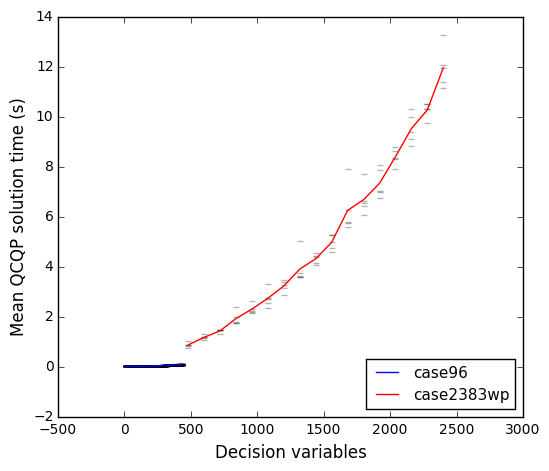

([-2.0,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0],Any[PyObject <matplotlib.text.Text object at 0x7fa125563160>,PyObject <matplotlib.text.Text object at 0x7fa125567048>,PyObject <matplotlib.text.Text object at 0x7fa12556d390>,PyObject <matplotlib.text.Text object at 0x7fa125478550>,PyObject <matplotlib.text.Text object at 0x7fa1254761d0>,PyObject <matplotlib.text.Text object at 0x7fa125478be0>,PyObject <matplotlib.text.Text object at 0x7fa12547d588>,PyObject <matplotlib.text.Text object at 0x7fa12547df98>,PyObject <matplotlib.text.Text object at 0x7fa12547f9e8>])

In [10]:
fig = figure(figsize=(6,5))

x96 = collect(2:2:72)*6
y96 = mean(line_times_96) # s

num_farms_vec = collect(80:20:400)
x2383 = num_farms_vec*6
y2383 = mean(line_times_2383) # s

plot(x96,y96,color="blue",alpha=1.)
hold(true)
plot(x2383,y2383,color="red",alpha=1.)

legend(["case96";"case2383wp"],loc=4,fontsize=11)

for i in 1:length(line_times_96)
    y96 = line_times_96[i]
    scatter(x96,y96,marker="_",facecolor="black",alpha=0.3)
end
for i in 1:length(line_times_2383)
    y2383 = line_times_2383[i]
    scatter(x2383,y2383,marker="_",facecolor="black",alpha=0.3)
end

# yscale("log")
# xscale("log")
# axis([0;2500;0;20])
xlabel("Decision variables")
ylabel("Mean QCQP solution time (s)")

xticks(size=10)
yticks(size=10)


## Average computation time per Matpower case

## Effects of non-identity precision matrix